# Статистика, освновой поток
## Практическое задание 4

В данном задании вы потренируетесь над практическим применением процедуры проверки статистических гипотез на примере критериев согласия, а так же рассмотрите различные модели линейной регрессии.

**Правила:**

* Дедлайн **15 декабря 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[base] Фамилия Имя - задание 4"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  8 баллов
* Задача 2 -  15 баллов
* Задача 3 -  10 баллов

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from scipy.linalg import eigvals

%matplotlib inline

## Критерии согласия

При возникновении затруднений посмотрите этот материал https://mipt-stats.gitlab.io/files/applied_stats_18/lectures/Критерии%20согласия%20в%20scipy.pdf

__________________
### Задача 1.

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий для проверки корректности генерации выборки $U\{1, ..., 10\}$.

Для данного распределения (выборки $X_1, ..., X_n$) формула для подсчета хи-квадрат статистики будет следующая:
$$\widehat{\chi} = \sum_{i = 1}^{n} \frac{(\mu_i - n p_i)^2}{n p_i}$$ где $\mu_i$ -количество повторений i-го элемента выборки $n$ - размер выборки, а $p_i$ - вероятность выпадания i-го элемента.

Критерий хи-квадрат задается как $${\widehat{\chi} > u_{1- \alpha}}$$ где $u_{1 - \alpha}$ - (1 - $\alpha$) - квантиль распределения $\chi^2_{m-1}$ (m - число исходов)

В данной задаче возьмем выборку размера n = 1000, а уровень значимости зададим $\alpha=0.05$, тогда $n \cdot p_i = 1000 \cdot \frac{1}{10} = 100, m = 10 \Rightarrow$ будем сравнивать с квантилью для распределения $\chi^2_9$

In [2]:
sample = sps.randint.rvs(low=1, high=11, size=1000)
unique_sample, repeat_num = np.unique(sample, return_counts=True)
statistic = np.sum(((repeat_num - 100)**2)/100)
print('Значение статистики хи-квадрат = %f' % statistic)
quant = sps.chi2.ppf(0.95, df=9)
print('(1- alpha)-квантиль распределения хи-квадрат с 9 степенями свободы = %f' %quant)

Значение статистики хи-квадрат = 7.920000
(1- alpha)-квантиль распределения хи-квадрат с 9 степенями свободы = 16.918978


**Вывод:**
Полученные результаты удоветворяют условию критерия $\widehat{\chi} < u_{1 - \alpha} \Rightarrow$ гипотеза $H_0$ не отвергается.

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

*Указания*
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.

In [3]:
sample = sps.poisson(mu=5).rvs(size=1000)
unique_sample, repeat_num = np.unique(sample, return_counts=True)

**Замечание:** 
Для полученной выборки $n \geq 50$ и минимальное число повторений должно быть $\geq 5$ для каждого элемента выборки, тогда критерий применим.

**Вывод:**

<...>

## Линейная регрессия

__________________
### Задача 2.

По шаблону напишите класс, реализующий гауссовскую линейную регрессию. Интерфейс этого класса в некоторой степени соответствует классу <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`LinearRegression`</a> из библиотеки `sklearn`.

In [4]:
class LinearRegression:
    def __init__(self):
        super()
        
    def fit(self, X, Y, alpha=0.95):
        ''' Обучение модели. Предполагается модель Y = X * theta + epsilon, 
            где X --- регрессор (матрица размера n x k), 
            Y --- отклик (матрица размера n x 1),
            а epsilon имеет нормальное распределение 
            с параметрами (0, sigma^2 * I_n).
            alpha --- уровень доверия для доверительного интервала.
        '''
        
        self.n, self.k = X.shape
        
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ Y
        self.sigma_sq = (1 / (self.n - self.k))*((Y - X @ self.theta).T @ (Y - X @ self.theta))
        quant_1 = sps.t(df=(self.n - self.k)).ppf((1 + alpha)/2)
        quant_2 = sps.t(df=(self.n - self.k)).ppf((1 - alpha)/2)
        A = np.diag((np.linalg.inv(X.T @ X)))
        self.conf_int = np.zeros(shape=(self.k, 2))
        self.conf_int[:, 0] = self.theta.T - np.sqrt(self.sigma_sq * A)*quant_1
        self.conf_int[:, 1] = self.theta.T - np.sqrt(self.sigma_sq * A)*quant_2
        
        return self
    
    def summary(self):
        print('Linear regression on %d features and %d examples' \
              % (self.k, self.n))
        print('Sigma: %.6f' % self.sigma_sq)
        
        print('{}\t|{}\t\t|{}\t\t|{}\t|'.format("theta index", "Estimation", "Left bound", "Right bound"))
        for i in range(0, self.k):
            print('{:d}\t\t|{:.5f}\t\t|{:.5f}\t\t|{:.5f}\t|'.format(i, self.theta[i], self.conf_int[i, 0],
                                                                    self.conf_int[i, 1]))
            
        
    def predict(self, X):
        ''' Возвращает предсказание отклика на новых объектах X. '''
        
        Y_pred = X @ self.theta
        return Y_pred

При реализации функции использовали следующие результаты:

* МНК-оценка: $\widehat{\theta} = (Z^{T}Z)^{-1}Z^{T}X$
* Несмещенная оценка для $\sigma^2$: $\widehat{\sigma}^2 = \frac{1}{n - k} ||X - Z\widehat{\theta}^2||^2$
* Границы доверительного интервала для $\theta_i$ уровня доверия $\gamma$: 
$(\widehat{\theta}_i - \sqrt{a_{i,i}\widehat{\sigma}^2} u_{\frac{1+\gamma}{2}} , \widehat{\theta}_i - \sqrt{a_{i,i}\widehat{\sigma}^2} u_{\frac{1-\gamma}{2}})$
* Предсказание отклика: $X \widehat{\theta}$

Загрузите данные о потреблении мороженного в зависимости от температуры воздуха и цены (файл `ice_cream.txt`).
Примените реализованный выше класс линейной регрессии к этим данным предполагая, что модель имеет вид $ic = \theta_1 + \theta_2\ t$, где $t$ --- температура воздуха (столбец `temp`), $ic$ --- постребление мороженного в литрах на человека (столбец `IC`).
Значения температуры предварительно переведите из Фаренгейта в Цельсий [(Фаренгейт — 32) / 1,8 = Цельсий].

К обученной модели примените фунцию `summary` и постройте график регрессии, то есть график прямой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t$, где $\widehat{\theta}_1, \widehat{\theta}_2$ --- МНК-оценки коэффициентов.
На график нанесите точки выборки.

Linear regression on 2 features and 30 examples
Sigma: 0.001786
theta index	|Estimation		|Left bound		|Right bound	|
0		|0.26210		|0.22761		|0.29660	|
1		|0.00311		|0.00213		|0.00409	|


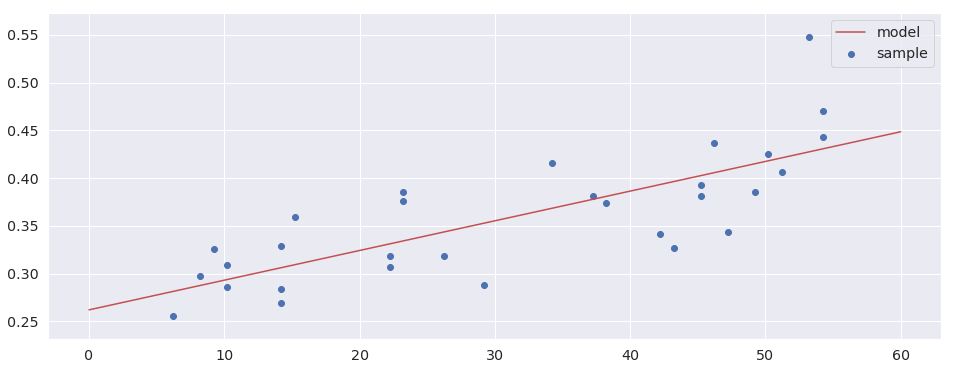

In [5]:
ice_cream = pd.read_csv('ice_cream.txt', sep='\t')
celsius = np.array(ice_cream['temp']) - 32/1.8
t = celsius.reshape(celsius.shape[0], 1)
ic = np.array(ice_cream['IC'])

X = np.hstack((np.ones_like(t), t))
Y = ic
lin_reg = LinearRegression().fit(X, Y)
lin_reg.summary()

plt.figure(figsize=(16,6))
grid = np.linspace(0, 60, 1000)
plt.scatter(celsius, ic, color='b', label='sample')
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1]*grid, color='r', label='model')

plt.legend()
plt.show()

Теперь учтите влияние года (столбец `Year`) для двух случаев:
* модель $ic = \theta_1 + \theta_2\ t + \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{1\ год\}, y_2 = I\{2\ год\}$. Поясните, почему нельзя рассмативать одну переменную $y$ --- номер года.
* для каждого года рассматривается своя линейная зависимость $ic = \theta_1 + \theta_2\ t$.

В каждом случае нарисуйте графики. Отличаются ли полученные результаты? От чего это зависит? Как зависит потребление мороженного от года? 

In [6]:
is_1st_year = [1 if elem == 0 else 0 for elem in np.array(ice_cream['Year'])]
is_2nd_year = [1 if elem == 1 else 0 for elem in np.array(ice_cream['Year'])]
is_3d_year = [1 if elem == 2 else 0 for elem in np.array(ice_cream['Year'])]
first_year = ice_cream[ice_cream['Year']==0]
second_year = ice_cream[ice_cream['Year']==1]
third_year = ice_cream[ice_cream['Year']==2]

Linear regression on 4 features and 30 examples
Sigma: 0.001016
theta index	|Estimation		|Left bound		|Right bound	|
0		|0.35136		|0.32469		|0.37802	|
1		|0.00609		|0.00474		|0.00745	|
2		|-0.07431		|-0.10708		|-0.04154	|
3		|-0.05782		|-0.08864		|-0.02699	|


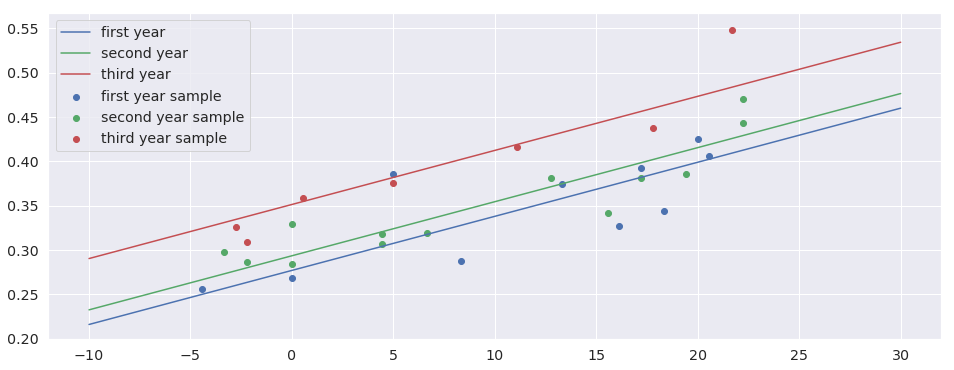

In [7]:
celsius = (np.array(ice_cream['temp'])- 32)/1.8
X = np.hstack((np.ones(shape=(np.array([celsius, is_1st_year, is_2nd_year]).T.shape[0],1)),
               np.array([celsius, is_1st_year, is_2nd_year]).T))

Y = np.array(ice_cream['IC'])
lin_reg = LinearRegression().fit(X, Y)
lin_reg.summary()

plt.figure(figsize=(16,6))
grid = np.linspace(-10, 30, 1000)
plt.scatter((first_year['temp'] - 32)/1.8, first_year['IC'], color='b', label='first year sample')
plt.scatter((second_year['temp'] - 32)/1.8, second_year['IC'], color='g', label='second year sample')
plt.scatter((third_year['temp'] - 32)/1.8, third_year['IC'], color='r', label='third year sample')
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1]*grid + lin_reg.theta[2], color='b', label='first year')
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1]*grid + lin_reg.theta[3], color='g', label='second year')
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1]*grid, color='r', label='third year')
              
plt.legend()
plt.show()


Results for first year
Linear regression on 2 features and 10 examples
Sigma: 0.001597
theta index	|Estimation		|Left bound		|Right bound	|
0		|0.28640		|0.23696		|0.33585	|
1		|0.00528		|0.00179		|0.00877	|

Results for second year
Linear regression on 2 features and 13 examples
Sigma: 0.000667
theta index	|Estimation		|Left bound		|Right bound	|
0		|0.29743		|0.27499		|0.31986	|
1		|0.00567		|0.00393		|0.00741	|

Results for third year
Linear regression on 2 features and 7 examples
Sigma: 0.000766
theta index	|Estimation		|Left bound		|Right bound	|
0		|0.33835		|0.30380		|0.37289	|
1		|0.00788		|0.00491		|0.01085	|


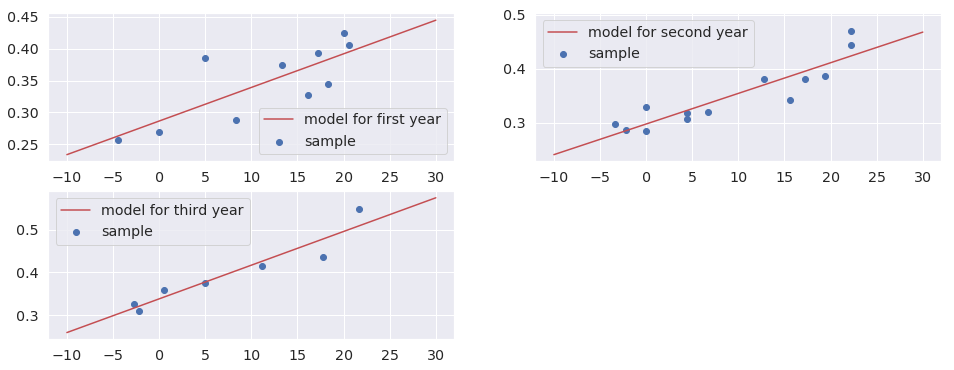

In [9]:
celsius = [(np.array(first_year['temp']) - 32)/1.8, (np.array(second_year['temp']) - 32)/1.8,
           (np.array(third_year['temp']) - 32)/1.8]
ic = [np.array(first_year['IC']), np.array(second_year['IC']), np.array(third_year['IC'])]
year = ['first', 'second', 'third']

plt.figure(figsize=(16,6))
grid = np.linspace(-10, 30, 1000)
for i in range(3):
    t = celsius[i].reshape(celsius[i].shape[0], 1)
    X = np.hstack((np.ones_like(t), t))
    Y = ic[i]
    lin_reg = LinearRegression().fit(X, Y)
    print('\nResults for %s year' % year[i])
    lin_reg.summary()
    plt.subplot(2, 2, i+1)
    plt.scatter(celsius[i], ic[i], color='b', label='sample')
    plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1]*grid, color='r', label='model for %s year' % year[i])
    plt.legend()
plt.show()

**Вывод:**

* Исходя из графика для первой модели, а также графиков для второй модели, обученной на различных годах, видим, что с увеличением года, потребление мороженного также увеличивается.

* Также можем заключить, что для 3го года модель получилась наиболее точная в обоих случаях(точки лежат ближе всего к графику). 

* Результаты в моделях схожи, но все же отличаются, так как обучены на разных данных(первая обучалась на некотором подмножестве данных, а вторая на данных для конкретного года).

Наконец, обучите модель на предсказание потребления мороженного в зависимости от всех переменных.
Не забудьте, что для года нужно ввести две переменных.
Для полученной модели выведите `summary`.

In [10]:
ic = ice_cream['IC']
price = ice_cream['price']
income = ice_cream['income']
celsius = (np.array(ice_cream['temp'] - 32))/1.8
lag_temp = ice_cream['Lag-temp']
           
X = np.hstack((np.ones(shape=(np.array([celsius, is_1st_year, is_2nd_year,
                                        price, income, lag_temp]).T.shape[0],1)),
               np.array([celsius, is_1st_year, is_2nd_year, price, income, lag_temp]).T))
Y = np.array(ic)
lin_reg = LinearRegression().fit(X, Y)
lin_reg.summary()

Linear regression on 7 features and 30 examples
Sigma: 0.001024
theta index	|Estimation		|Left bound		|Right bound	|
0		|0.83549		|0.18862		|1.48235	|
1		|0.00565		|0.00380		|0.00751	|
2		|-0.11773		|-0.19024		|-0.04522	|
3		|-0.07959		|-0.13376		|-0.02542	|
4		|-0.65930		|-2.46709		|1.14850	|
5		|-0.00323		|-0.00777		|0.00131	|
6		|-0.00002		|-0.00089		|0.00084	|


Но это еще не все.
Постройте теперь линейную регрессию для модели $ic = \theta_1 + \theta_2\ t + \theta_3\ t^2 + \theta_4\ t^3$.
Выведите для нее summary и постройте график предсказания, то есть график кривой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t + \widehat{\theta}_3\ t^2 + \widehat{\theta}_4\ t^3$. Хорошие ли получаются результаты?

Linear regression on 4 features and 30 examples
Sigma: 0.001529
theta index	|Estimation		|Left bound		|Right bound	|
0		|0.31990		|0.29529		|0.34451	|
1		|0.00720		|0.00039		|0.01401	|
2		|-0.00085		|-0.00186		|0.00015	|
3		|0.00004		|0.00000		|0.00007	|


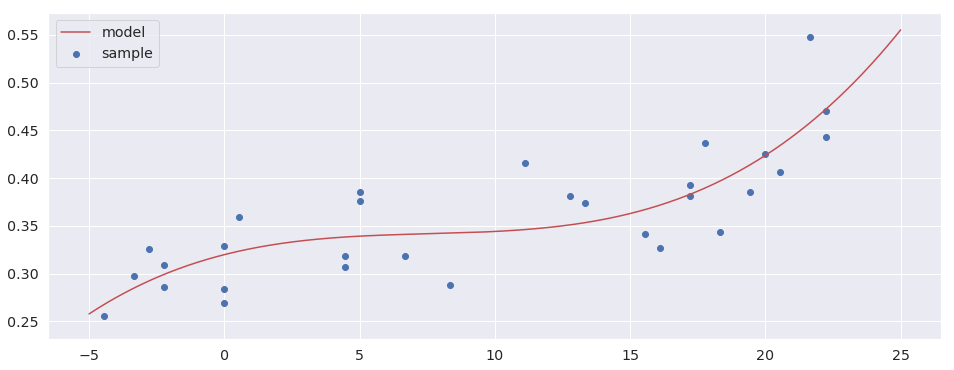

In [11]:
X = np.hstack((np.ones(shape=(np.array([celsius, celsius**2, celsius**3]).T.shape[0],1)),
               np.array([celsius, celsius**2, celsius**3]).T))
Y = np.array(ic)
lin_reg = LinearRegression().fit(X, Y)
lin_reg.summary()

plt.figure(figsize=(16,6))
grid = np.linspace(-5, 25, 1000)
plt.scatter(celsius, ic, color='b', label='sample')
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1]*grid + lin_reg.theta[2]*grid**2 + lin_reg.theta[3]*grid**3,
         color='r', label='model')
plt.legend()
plt.show()

**Вывод:**
Точки выборки лежат достаточно близко к графику, из чего можем заключить, что результаты получились неплохие.    

Чтобы понять, почему так происходит, выведите значения матрицы $(X^T X)^{-1}$ и посчитайте для нее индекс обусловленности $\sqrt{\left.\lambda_{max}\right/\lambda_{min}}$, где $\lambda_{max}, \lambda_{min}$ --- максимальный и минимальный собственные значения матрицы $X^T X$. Собственные значения можно посчитать функцией <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html">`scipy.linalg.eigvals`</a>.

Прокомментируйте полученные результаты. Помочь в этом может следующая <a href="https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8">статья</a>.

In [12]:
from scipy.linalg import eigvals

M = np.linalg.inv(X.T @ X)
print(M)

L = eigvals(X.T @ X)
print('Получили индекс обусловленности: {:.3f}'.format(np.sqrt(np.max(L)/np.min(L))))

[[  9.37480084e-02   3.89861423e-03  -1.78656900e-03   6.69029822e-05]
 [  3.89861423e-03   7.18536599e-03  -8.80905447e-04   2.52158328e-05]
 [ -1.78656900e-03  -8.80905447e-04   1.56779604e-04  -5.35416603e-06]
 [  6.69029822e-05   2.52158328e-05  -5.35416603e-06   1.95858936e-07]]
Получили индекс обусловленности: 8140.395+0.000j


**Вывод:**
Получили число обусловленности, много большее единицы (наилучшим таким числом считается именно единица), из чего заключаем, что матрица $X^{T} X$ плохо обусловленна, и для уравнения $X^{T} X u = f$ погрешность решения будет велика.

__________________
### Задача 3.

В данной задаче нужно реализовать функцию отбора признаков для линейной регрессии. Более подробно, пусть у объектов есть признаки $x_1, ... , x_k$. Нужно определить, какое подмножество признаков $x_{j_1}, ... , x_{j_s}$ нужно использовать, чтобы качество полученной модели $y = \theta_0 + \theta_{j_1} x_{j_1} + ... + \theta_{j_s} x_{j_s}$ было максимальным.

Один из методов, решающих эту задачу описан ниже.

Сначала имеющаяся выборка случайно разделяется на обучающую выборку и тестовую (train и test). Для некоторого подмножества признаков на обучающей выборке обучается модель, после чего вычисляется её качество на тестовой выборке. Операция повторяется для всех подмножеств признаков. Лучшей считается модель с наилучшим качеством на тестовой выборке.

Иначе говоря, сначала выборка $X$ разделяется по объектам на $X_{train} \sqcup X_{test} = X$ . Далее, в цикле по всем подмножествам индексов признаков $(j_1, .. j_s)$ на обучающей выборке $X_{train}$ обучается модель $y = \theta_{j_1} x_{j_1} + ... + \theta_{j_s} x_{j_s}$, после чего считается её качество на $X_{test}$.

В данной задаче под метрикой качества понимается средний квадрат ошибки (mean squared error)

$$MSE = \frac{1}{n} \sum\limits_{x \in X_{test}} \left(\widehat{y}(x) - Y(x)\right)^2,$$
где $x$ -  объект, $Y(x)$ - значение целевой переменной (отклика) на объекте $x$, а $\widehat{y}(x)$ - оценка отклика на объекте $x$.

Заметим, что полный перебор подмножеств признаков требует большого времени. Кратко проблема отбора признаков состоит в том, что могут быть два признака, добавление каждого из которых ухудшает (не улучшает) качество, но добавление двух признаков сразу увеличивает качество.

Для выполнения задания воспользуйтесь следующими функциями:
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`sklearn.linear_model.LinearRegression`</a>
--- реализация линейной регрессии. В данной реализации свободный параметр $\theta_1$ по умолчанию автоматически включается в модель. Отключить это можно с помощью `fit_intercept=False`, но это не нужно. *В данной задаче требуется, чтобы вы воспользовались готовой реализацией линейной регрессии, а не своей. Ведь на практике важно уметь применять готовые реализации, а не писать их самостоятельно.*

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">`sklearn.model_selection.train_test_split`</a>
--- функция разбиения данных на train и test. Установите параметр `test_size=0.3` и `random_state=17`.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">`sklearn.metrics.mean_squared_error`</a>
--- реализация MSE.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Для перебора реализуйте следующий класс. Данный класс частично реализует интерфейс, похожий на интерфейс <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">`sklearn.model_selection.GridSearchCV`</a>

In [14]:
class BestFeaturesSelection:
    def __init__(self, estimator, scoring, parameters=dict(), 
                 test_size=0.3, random_state=17, minimize=True):
        """
        Отбор наилучших признаков
        estimator: конструктор класса, например, LinearRegression
        paramters: параметры, передаваемые конструктору estimator, 
                    например dict(fit_intercept=False)
        scoring: функция риска, например, mean_squared_error
        minimize: минимизировать ли функционал качества 
                    (иначе - максимизировать)
        """
        
        self.estimator = estimator
        self.parameters = parameters
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
        self.minimize=minimize
        
    def fit(self, X, y):
        """
        Подбор лучшего подмножества признаков 
        и обучение модели на нём
        """
        # разделение выборки на test и train. Не перепутайте порядок !
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
        
        self.results_ = []  # список пар (вектор использованных признаков, 
                            # значение функции потерь)
        features_count = X.shape[1]
        
        for bitmask in range(1, 2 ** features_count):
            subset = [i == "1" for i in np.binary_repr(bitmask, 
                                                       width=features_count)]
            #print(subset)
            # binary_repr возвращает строку длины width с двоичным 
            # представлением числа и ведущими нулями
            cur_features = np.arange(features_count)[subset]
            cur_reg = self.estimator()
            cur_reg.fit(X_train[:, cur_features], y_train)
            # вычисление качества модели
            score = self.scoring(y_test, cur_reg.predict(X_test[:, cur_features]))
            self.results_.append((subset, score))
        
        self.results_.sort(key = lambda pair: pair[1],
                           reverse=not self.minimize) 
        # сортируем по второму элементу в нужном порядке
        
        self._best_subset = self.results_[0][0]
        self._best_estimator = self.estimator(**self.parameters)
        self._best_estimator.fit(X_train[:, self._best_subset], y_train)
        
        return self._best_estimator
        
    def predict(self, X):
        """
        Предсказание модели, 
        обученной на наилучшем подмножестве признаков.
        """
        
        return self._best_estimator.predict(X[:, self._best_subset]);

Примените реализованный отбор признаков к датасетам
* <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">Yacht Hydrodynamics</a> --- для парусных яхт нужно оценить остаточное сопротивление на единицу массы смещения (последний столбец) в зависимости от различных характеристик яхты.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston Housing Prices</a> --- цены на дома в Бостоне в зависимости от ряда особенностей.

Посмотрите на графики зависимости целевой переменной от каждого признака. Какие бы признаки вы стали использовать? Совпадает ли ваш выбор с результатом алгоритма, описанного выше? 

## Работа с датасетом о яхтах:

In [15]:
columns = ['Longitudinal position of the center of buoyancy', 'Prismatic coefficient', 'Length-displacement ratio',
           'Beam-draught ratio', 'Length-beam ratio', 'Froude number',
           'Residuary resistance per unit weight of displacement']
yacht = np.array(pd.read_csv('yacht_hydrodynamics.data', names=columns, delim_whitespace=True))

In [16]:
yacht_model = BestFeaturesSelection(estimator=LinearRegression, scoring=mean_squared_error)
best_yacht_model = yacht_model.fit(yacht[:, :6], yacht[:, 6])

**Построение графиков зависимости остаточного сопротивления на единицу массы смещения от каждой из оставшихся характеристик яхты:**

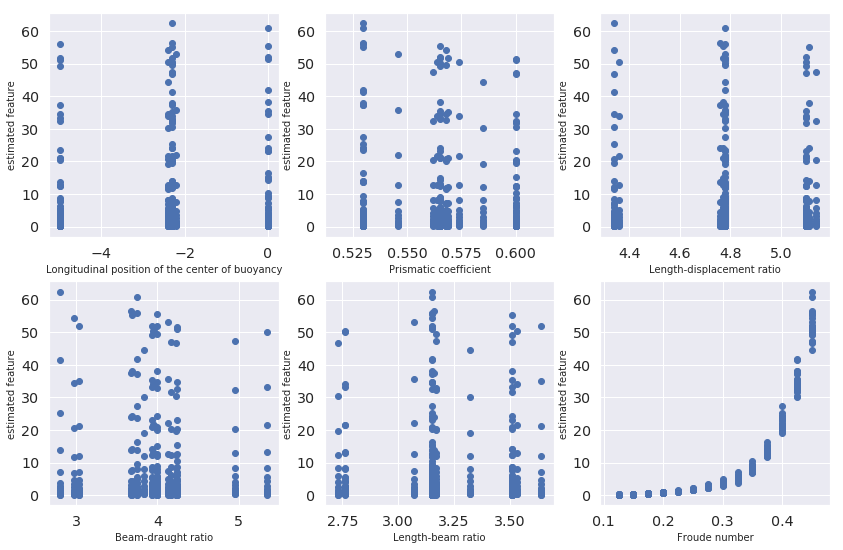

In [17]:
plt.figure(figsize=(14,14))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.scatter(yacht.T[i], yacht.T[6], color='b')
    plt.xlabel(columns[i], fontsize=10)
    plt.ylabel('estimated feature', fontsize=10)

plt.show()

In [18]:
print('Совокупность характеристик, выбранная как наилучшая построенной моделью:')
print(np.array(columns)[np.arange(6)[yacht_model._best_subset]])

Совокупность характеристик, выбранная как наилучшая построенной моделью:
['Prismatic coefficient' 'Froude number']


**Вывод:**
Исходя из графиков, зависимость лучше всего прослеживается для Froude number, поэтому можно предположить, что этот признак хорошо подойдет для использования.

Среди признаков, выбранных моделью, он имеется, но, видимо, в совокупности с Prismatic coefficient дает лучший результат, чем отдельно.

##  Работа с датасетом о ценах на дома:

In [19]:
from sklearn.datasets import load_boston
prices = load_boston()
prices_model = BestFeaturesSelection(estimator=LinearRegression, scoring=mean_squared_error)
best_prices_model = prices_model.fit(prices.data, prices.target)

**Построение графиков зависимости оцениваемого параметра от каждой из заданных особенностей:**

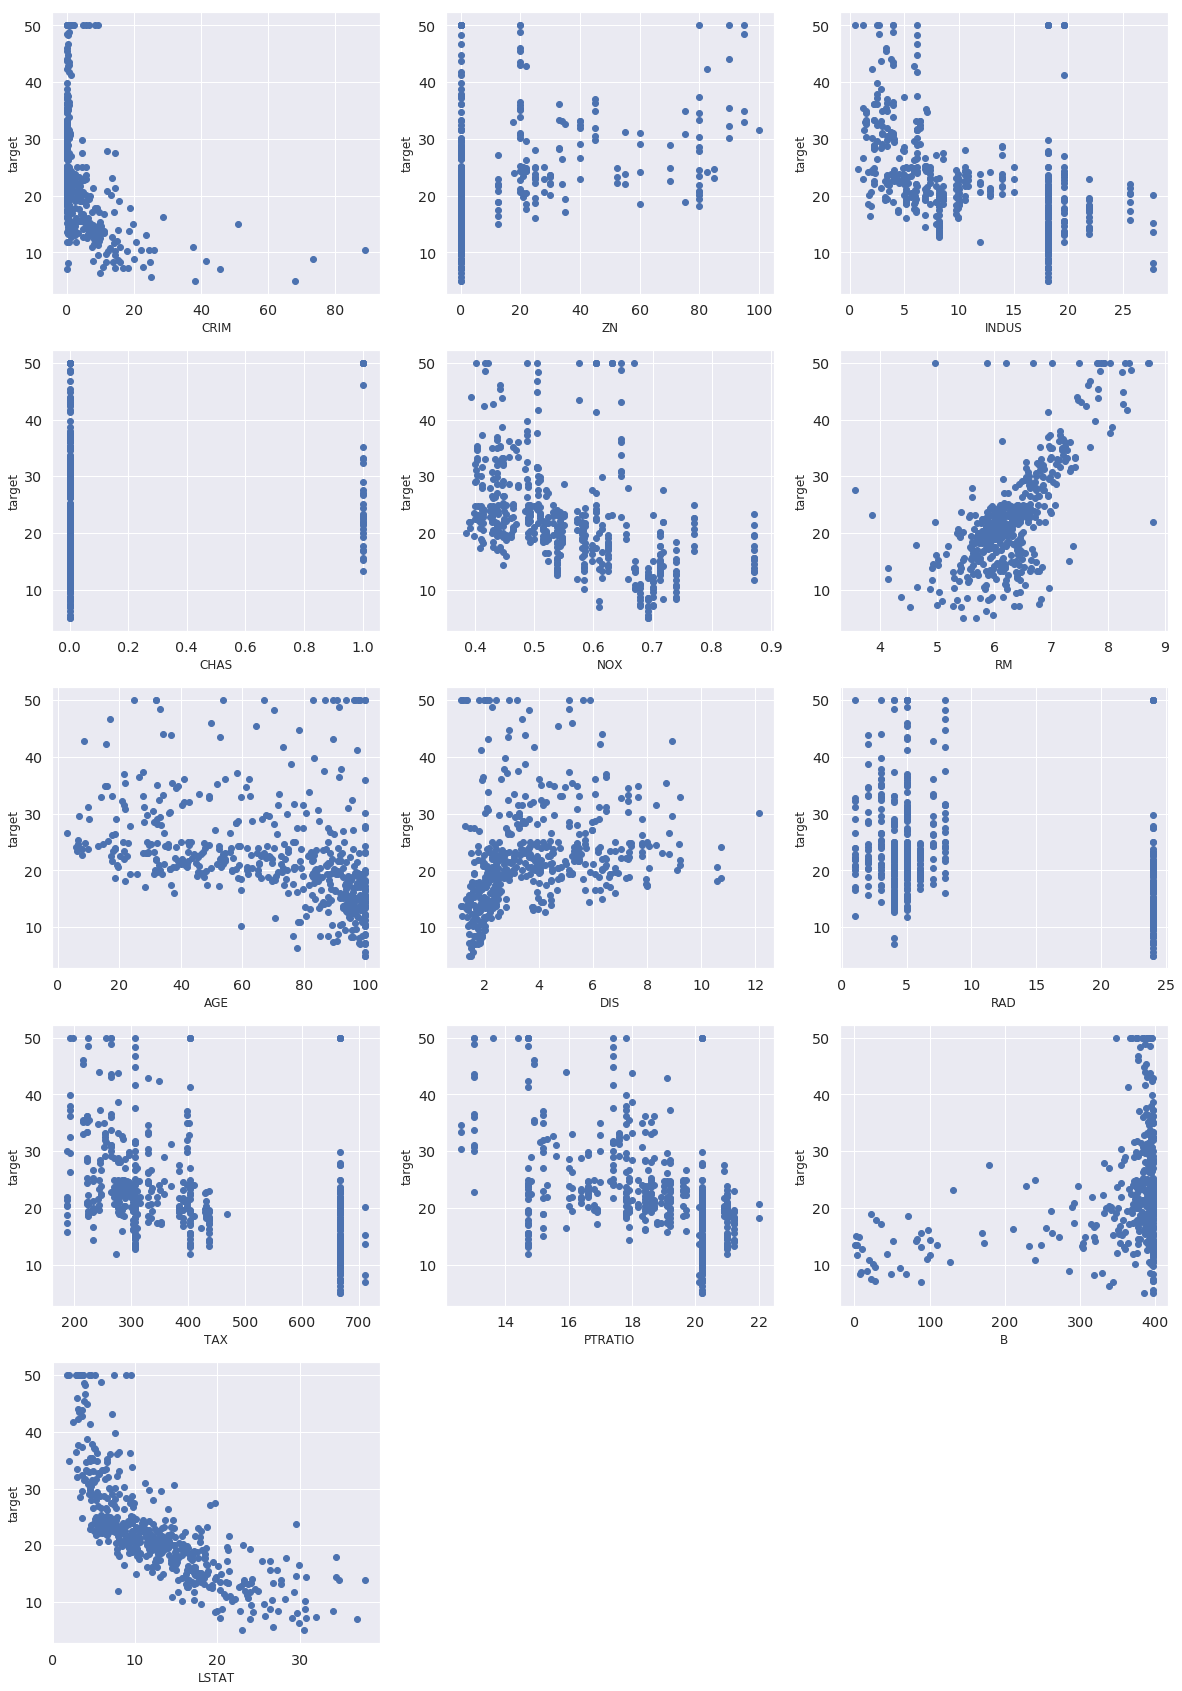

In [20]:
plt.figure(figsize=(20,30))
for i in range(13):
    plt.subplot(5, 3, i+1)
    plt.scatter((prices.data.T)[i], prices.target, color='b')
    plt.ylabel('target', fontsize=12)
    plt.xlabel(prices.feature_names[i], fontsize=12)

plt.show()

In [21]:
print('Совокупность особенностей, выбранная построенной моделью как наилучшая:')
print(prices.feature_names[np.array(np.arange(13)[prices_model._best_subset])])

Совокупность особенностей, выбранная построенной моделью как наилучшая:
['CRIM' 'ZN' 'NOX' 'RM' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']


**Вывод:**
В этом случае хорошей зависимости нигде не видно, разве что можно выделить LSTAT(в совокупности, выбранной моделью, она есть), так что тут стоит расстматривать, какой результат дает каждая из совокупностей особенностей.